Top Rated Movies (min 50 ratings):
                                 title  avg_rating  num_ratings
315              Close Shave, A (1995)    4.559140           93
1622        Wrong Trousers, The (1993)    4.525773           97
1256           Schindler's List (1993)    4.489451          237
270                  Casablanca (1942)    4.441026          195
1292  Shawshank Redemption, The (1994)    4.417040          223
1545        Usual Suspects, The (1995)    4.398104          211
1373                  Star Wars (1977)    4.359504          484
1190                Rear Window (1954)    4.358382          173
1453             Third Man, The (1949)    4.327869           61
3                  12 Angry Men (1957)    4.313725          102

Overall Average Rating: 3.53

Highly Rated Movies with Sufficient Ratings:
                                       title  avg_rating  num_ratings
1256                 Schindler's List (1993)    4.489451          237
270                        Casablanca (1942) 

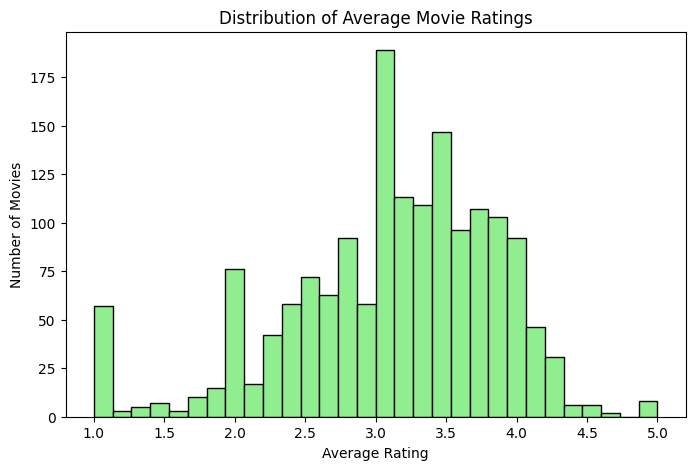

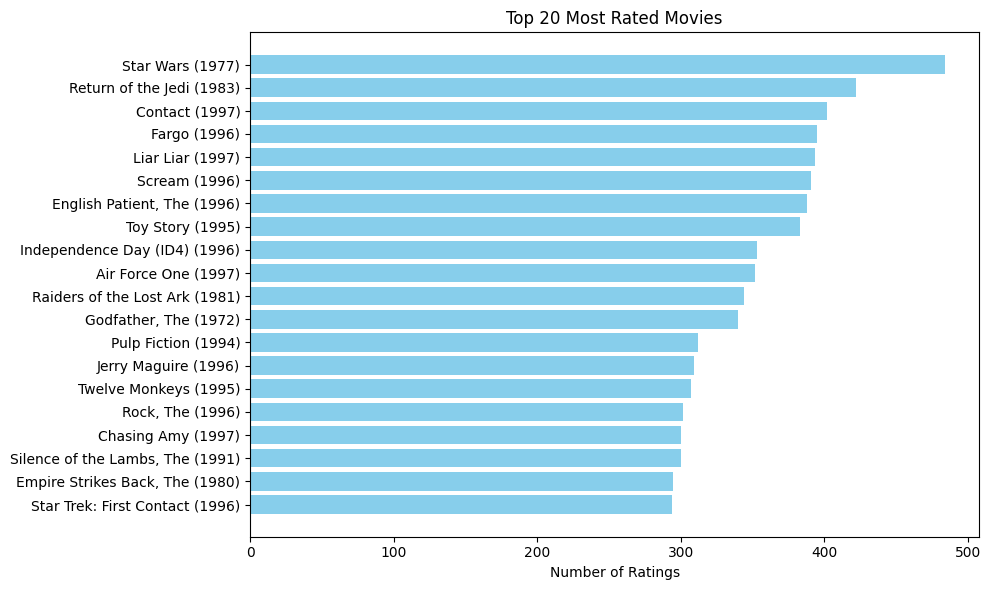

In [9]:
# MovieLens 100K Ratings Analysis

# Author: Prajwal R
# Tools Used: Python, NumPy, Pandas, Matplotlib
# Dataset: MovieLens 100K (GroupLens Research)

# Overview
# This project analyzes the MovieLens 100K dataset containing 100,000+ movie ratings from users.
# The goal is to explore user preferences, identify top-rated movies, and visualize trends in movie popularity.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load ratings data (u1.base)
ratings = pd.read_csv("u1.base", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

# Load movie info (u.item)
movies = pd.read_csv(
    "u.item",
    sep="|",
    encoding="latin-1",
    names=["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
           "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime",
           "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery",
           "Romance", "Sci-Fi", "Thriller", "War", "Western"]
)

# Merge ratings with movie titles
df = pd.merge(ratings, movies[["item_id", "title"]], on="item_id")

# Clean: remove missing titles, remove duplicates
df = df.dropna(subset=["title"]).drop_duplicates()

# Movie statistics: average rating and number of ratings
movie_stats = df.groupby("title")["rating"].agg(["mean", "count"]).reset_index()
movie_stats = movie_stats.rename(columns={"mean": "avg_rating", "count": "num_ratings"})

# Top movies with at least 50 ratings
top_movies = movie_stats[movie_stats["num_ratings"] >= 50].sort_values(by="avg_rating", ascending=False)

print("Top Rated Movies (min 50 ratings):")
print(top_movies.head(10))

# Overall average rating
overall_avg = np.mean(df["rating"])
print(f"\nOverall Average Rating: {overall_avg:.2f}")

# Highly rated movies with more than 100 ratings
highly_rated = movie_stats[(movie_stats["avg_rating"] > 4.3) & (movie_stats["num_ratings"] >= 100)]
print("\nHighly Rated Movies with Sufficient Ratings:")
print(highly_rated.sort_values(by="avg_rating", ascending=False))
print(" ")
# Plot: Rating distribution
plt.figure(figsize=(8, 5))
plt.hist(movie_stats["avg_rating"], bins=30, color="lightgreen", edgecolor="black")
plt.title("Distribution of Average Movie Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.show()
print(" ")

# Plot: Top 20 most rated movies
plt.figure(figsize=(10, 6))
top_by_count = movie_stats.sort_values(by="num_ratings", ascending=False).head(20)
plt.barh(top_by_count["title"], top_by_count["num_ratings"], color="skyblue")
plt.xlabel("Number of Ratings")
plt.title("Top 20 Most Rated Movies")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Conclusion

#- The dataset shows that some older movies still maintain high average ratings despite fewer reviews.
#- Popularity (number of ratings) does not always correlate with higher ratings.
#- Genre-specific and year-based analyses could provide deeper insights for recommendation systems.
